In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path = 'data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data = (data - data.mean())/ data.std()
print(data.head())




   Population    Profit
0   -0.529654  2.132905
1   -0.680150  0.597261
2    0.092716  1.419690
3   -0.298872  1.091575
4   -0.594333  0.178606


In [2]:
def cost_function(x, y, theta):
    vec = np.power((np.dot(x,theta.T)-y),2)
    sum = np.sum(vec)/(2*x.shape[0])
    return sum

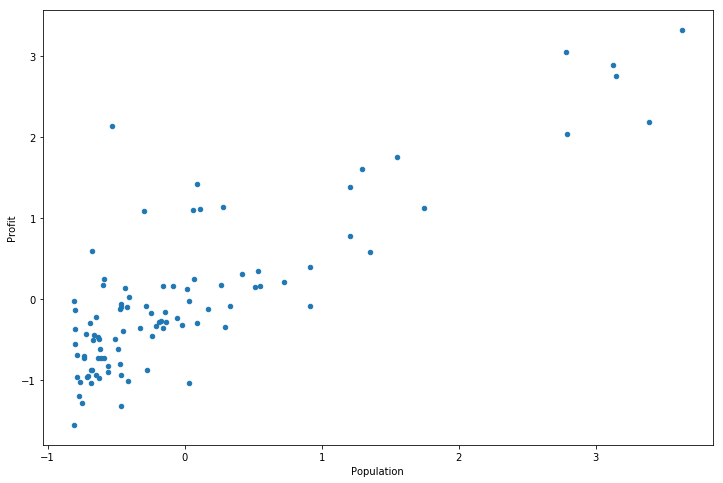

In [3]:
data.plot( kind='scatter',x='Population', y='Profit', figsize=(12,8))

In [4]:
data.insert(0, 'Ones', 1)


In [5]:
cols = data.shape[1] #no. of columns being denoted as the 1th element of the array
cols

3

In [6]:
x=data.iloc[:, 0:cols-1]


In [7]:
y = data.iloc[:,cols-1:cols]

In [8]:
x.values

array([[ 1.        , -0.52965418],
       [ 1.        , -0.68014967],
       [ 1.        ,  0.09271597],
       [ 1.        , -0.29887204],
       [ 1.        , -0.59433313],
       [ 1.        ,  0.05765031],
       [ 1.        , -0.17659446],
       [ 1.        ,  0.10809111],
       [ 1.        , -0.4324678 ],
       [ 1.        , -0.80240141],
       [ 1.        , -0.63286142],
       [ 1.        ,  1.55151956],
       [ 1.        , -0.62684057],
       [ 1.        ,  0.06423966],
       [ 1.        , -0.65094982],
       [ 1.        , -0.71847124],
       [ 1.        , -0.46368321],
       [ 1.        , -0.78289178],
       [ 1.        , -0.44709356],
       [ 1.        , -0.28140382],
       [ 1.        , -0.50924013],
       [ 1.        ,  3.12934483],
       [ 1.        , -0.68986572],
       [ 1.        , -0.47383855],
       [ 1.        , -0.67053698],
       [ 1.        ,  2.78695726],
       [ 1.        ,  1.20628953],
       [ 1.        ,  0.72281245],
       [ 1.        ,

In [9]:
y.values

array([[ 2.13290482],
       [ 0.59726104],
       [ 1.41969013],
       [ 1.09157508],
       [ 0.17860583],
       [ 1.09738242],
       [-0.2705561 ],
       [ 1.11807109],
       [ 0.13784552],
       [-0.36704878],
       [-0.46947585],
       [ 1.75415697],
       [-0.48709752],
       [ 0.25165135],
       [-0.92971166],
       [-0.42216413],
       [-0.09697089],
       [-0.9579154 ],
       [-0.39695661],
       [-0.08163587],
       [-0.49009193],
       [ 2.89058201],
       [-0.2860363 ],
       [-0.11825845],
       [-0.50027293],
       [ 3.04865071],
       [ 1.39047192],
       [ 0.21914836],
       [ 1.60661408],
       [ 3.32250338],
       [-1.28108876],
       [ 0.02857667],
       [ 1.14238936],
       [-0.72403724],
       [ 0.12766451],
       [-0.23171947],
       [-0.31264121],
       [-0.44395982],
       [ 0.77634507],
       [-0.06201793],
       [-0.95867761],
       [-0.34982637],
       [-0.08234364],
       [-0.61676466],
       [ 0.16200045],
       [-0

In [10]:
theta = np.zeros((1,2))
theta

array([[ 0.,  0.]])

In [11]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
cost_function(x,y, theta)


Profit    0.494845
dtype: float64

In [16]:
def gradient_descent(x,y, theta, alpha, iterations):
    temp = theta.copy()
    #print(temp)
    #Scrape training data to exclude the ones.
    x_1 = x.iloc[:, 1:2]
    
    #initialise the cost array
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        errorx =np.dot(x , theta.T) - y
        
        
        temp[0,0] = theta[0,0] - (1/x.shape[0])*alpha*np.sum(errorx)
        
        
        #print (theta[0,0])
        
        temp[0,1] = theta[0,1] - (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T))  
         
        #print ((1/x.shape[0])*alpha*np.sum(errorx), (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T)))
        theta = temp.copy()
        cost[i] = cost_function(x, y, theta)
        #temp = theta.copy()
        
        
        #print(temp)
    return theta, cost

In [20]:
theta = np.ones((1,2))
alpha =0.01
iterations = 1000
print ("AS")
cost_function(x, y, theta)
final_theta, cost = gradient_descent(x, y, theta,alpha, iterations)
print("SD")
cost_function(x, y, final_theta)

AS
SD


Profit    0.160455
dtype: float64

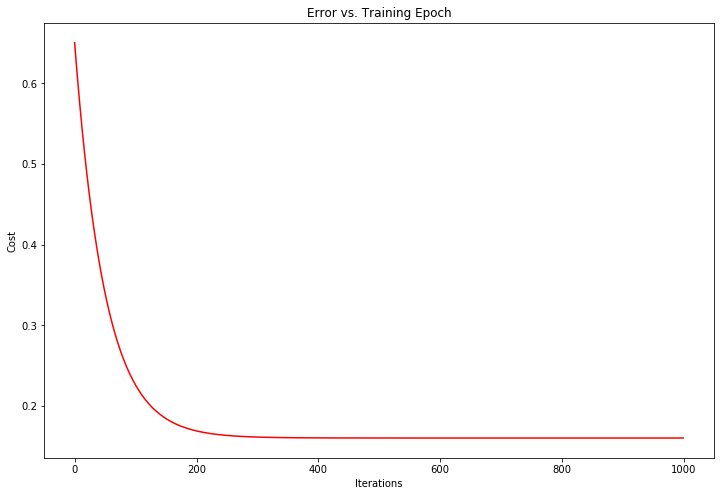

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')